In [30]:
import numpy as np
from scipy import stats

In [42]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from utils import run_random_forest_experiment, stopping_rule

from IT_methods.utils import equal_frequency_binning
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
def get_bin(x, n_bins):
    bins = np.linspace(-1, 1, n_bins+1)
    for i in range(len(bins)-1):
        if bins[i] <= x and x < bins[i+1]:
            return i

    return n_bins - 1

def discretize(X, n_bins):
    for i in range(len(X)):
        X[i] = get_bin(X[i], n_bins)
    return X

In [59]:
#101

In [60]:
def experiment(seed):
    np.random.seed(seed)
    size = 1000
    X1 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
    X2 = stats.norm.rvs(0, 5, size=size).reshape(-1,1)
    X3 = stats.norm.rvs(1, 5, size=size).reshape(-1,1)
    X4 = stats.norm.rvs(-1, 5, size=size).reshape(-1,1)
    X5 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
    X6 = stats.norm.rvs(0, 5, size=size).reshape(-1,1)
    X7 = stats.norm.rvs(1, 5, size=size).reshape(-1,1)
    X8 = stats.norm.rvs(-1, 5, size=size).reshape(-1,1)

    predictors = [X1, X2, X3, X4, X5, X6, X7, X8]

    for i in range(len(predictors)):
        predictors[i] = discretize(predictors[i], 10).astype(int)

    y = predictors[0] + predictors[1] + predictors[2] * predictors[3] + predictors[1] * predictors[3]
    y = y.flatten()

    X = np.hstack(predictors)

    df_stopping = stopping_rule(X, y, random_state=seed)
    jmi_num = len(df_stopping.loc[df_stopping.Method == 'JMI', ['Selected Features']].values[0][0])
    cmim_num = len(df_stopping.loc[df_stopping.Method == 'CMIM', ['Selected Features']].values[0][0])



    return jmi_num, cmim_num

In [61]:
jmi_perf = []
cmim_perf = []
for seed in list(range(50)):
    jmi_num, cmim_num = experiment(seed)
    jmi_perf.append(jmi_num)
    cmim_perf.append(cmim_num)


JMI selected features: [0, 1, 2, 3, 4, 5, 7, 6]
Accuracy: 65.50%, F1_macro: 21.46%

CMIM selected features: [0, 1, 2, 3, 4]
Accuracy: 76.50%, F1_macro: 34.85%

JMI selected features: [0, 2, 3, 1, 4, 6, 7, 5]
Accuracy: 73.00%, F1_macro: 28.20%

CMIM selected features: [0, 2, 1, 4]
Accuracy: 73.50%, F1_macro: 28.37%

JMI selected features: [0, 1, 2, 3, 4, 6, 5, 7]
Accuracy: 69.00%, F1_macro: 26.76%

CMIM selected features: [0, 1, 2, 4]
Accuracy: 69.50%, F1_macro: 28.57%

JMI selected features: [0, 2, 3, 1, 4, 7, 6, 5]
Accuracy: 69.00%, F1_macro: 19.08%

CMIM selected features: [0, 2, 3, 1, 4]
Accuracy: 77.00%, F1_macro: 30.87%

JMI selected features: [0, 1, 3, 2, 4, 7, 6, 5]
Accuracy: 72.00%, F1_macro: 23.44%

CMIM selected features: [0, 1, 2, 4]
Accuracy: 74.50%, F1_macro: 26.90%



In [38]:
np.average(jmi_perf)


8.0

In [39]:
np.average(cmim_perf)

4.76

In [62]:
np.random.seed(101)
size = 1000
X1 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
X2 = stats.norm.rvs(0, 5, size=size).reshape(-1,1)
X3 = stats.norm.rvs(1, 5, size=size).reshape(-1,1)
X4 = stats.norm.rvs(-1, 5, size=size).reshape(-1,1)
X5 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
X6 = stats.norm.rvs(0, 5, size=size).reshape(-1,1)
X7 = stats.norm.rvs(1, 5, size=size).reshape(-1,1)
X8 = stats.norm.rvs(-1, 5, size=size).reshape(-1,1)

predictors = [X1, X2, X3, X4, X5, X6, X7, X8]

for i in range(len(predictors)):
    predictors[i] = discretize(predictors[i], 10).astype(int)

y = predictors[0] + predictors[1] + predictors[2] * predictors[3] + predictors[1] * predictors[3]
y = y.flatten()

X = np.hstack(predictors)

In [63]:
df = run_random_forest_experiment(
    X, y, 4, save_csv="results/artificial_not_working.csv", random_state=1)

All features accuracy: 66.00%, F1_macro: 24.83%

Feature importance selected features: [0 1 3 2]
Accuracy: 79.00%, F1_macro: 38.50%

RFE selected features: [0 1 2 3]
Accuracy: 79.00%, F1_macro: 38.61%

JMI selected features: [0, 1, 3, 2]
Accuracy: 79.00%, F1_macro: 38.50%

mRMR selected features: [0, 3, 1, 2]
Accuracy: 79.00%, F1_macro: 38.93%

CMIM selected features: [0, 1, 2, 3]
Accuracy: 79.00%, F1_macro: 38.61%

Randomly selected features: [2, 4, 0, 7]
Accuracy: 60.50%, F1_macro: 13.52%



In [64]:
df

Method         Selected Features  Accuracy   F1_macro
0        All features  [0, 1, 2, 3, 4, 5, 6, 7]      66.0  24.834776
1  Feature importance              [0, 1, 3, 2]      79.0  38.504132
2                 RFE              [0, 1, 2, 3]      79.0  38.609743
3                 JMI              [0, 1, 3, 2]      79.0  38.504132
4                mRMR              [0, 3, 1, 2]      79.0  38.929972
5                CMIM              [0, 1, 2, 3]      79.0  38.609743
6              Random              [2, 4, 0, 7]      60.5  13.522322

In [65]:
df2 = run_random_forest_experiment(
    X, y, 5, save_csv="results/artificial_not_working.csv", random_state=1)

All features accuracy: 66.00%, F1_macro: 24.83%

Feature importance selected features: [0 1 3 2 4]
Accuracy: 73.00%, F1_macro: 27.06%

RFE selected features: [0 1 2 3 4]
Accuracy: 73.00%, F1_macro: 27.51%

JMI selected features: [0, 1, 3, 2, 4]
Accuracy: 73.00%, F1_macro: 27.06%

mRMR selected features: [0, 3, 1, 2, 4]
Accuracy: 72.50%, F1_macro: 27.68%

CMIM selected features: [0, 1, 2, 3, 4]
Accuracy: 73.00%, F1_macro: 27.51%

Randomly selected features: [2, 4, 0, 7, 5]
Accuracy: 57.00%, F1_macro: 13.16%



In [66]:
df2

Method         Selected Features  Accuracy   F1_macro
0        All features  [0, 1, 2, 3, 4, 5, 6, 7]      66.0  24.834776
1  Feature importance           [0, 1, 3, 2, 4]      73.0  27.059131
2                 RFE           [0, 1, 2, 3, 4]      73.0  27.506968
3                 JMI           [0, 1, 3, 2, 4]      73.0  27.059131
4                mRMR           [0, 3, 1, 2, 4]      72.5  27.684145
5                CMIM           [0, 1, 2, 3, 4]      73.0  27.506968
6              Random           [2, 4, 0, 7, 5]      57.0  13.163697

In [57]:
df

Method         Selected Features  Accuracy   F1_macro
0        All features  [0, 1, 2, 3, 4, 5, 6, 7]      36.5  15.732839
1  Feature importance              [0, 4, 3, 1]      35.5  16.876247
2                 RFE              [0, 1, 2, 3]      63.5  42.859003
3                 JMI              [0, 1, 3, 2]      64.0  44.277394
4                mRMR              [0, 3, 1, 2]      64.0  44.465566
5                CMIM              [0, 1, 3, 2]      64.0  44.277394
6              Random              [2, 4, 0, 7]      16.0   5.675081

In [5]:
size = 1000
X1 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
X2 = stats.norm.rvs(0, 5, size=size).reshape(-1,1)
X3 = stats.norm.rvs(1, 5, size=size).reshape(-1,1)
X4 = stats.norm.rvs(-1, 5, size=size).reshape(-1,1)
X5 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
X6 = stats.norm.rvs(0, 5, size=size).reshape(-1,1)
X7 = stats.norm.rvs(1, 5, size=size).reshape(-1,1)
X8 = stats.norm.rvs(-1, 5, size=size).reshape(-1,1)

# X1 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X2 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X3 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X4 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X5 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X6 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X7 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)
# X8 = stats.norm.rvs(0, 1, size=size).reshape(-1,1)


# y = discretize(X1 + X2, 25)#(X1 + X2  < 0).astype(int)#+ X3*X4 + X1*X3
# y = y.flatten()

In [6]:
predictors = [X1, X2, X3, X4, X5, X6, X7, X8]

for i in range(len(predictors)):
    predictors[i] = discretize(predictors[i], 10).astype(int)


In [7]:
y = predictors[0] + predictors[1] + predictors[2] * predictors[3] + predictors[1] * predictors[3]
y = y.flatten()

In [8]:
X = np.hstack(predictors)

In [14]:
df_stopping = stopping_rule(X, y)

JMI selected features: [0, 1, 3, 2, 4, 7, 6, 5]
Accuracy: 70.50%, F1_macro: 18.34%

CMIM selected features: [0, 1, 3, 2, 4]
Accuracy: 77.50%, F1_macro: 25.80%



In [15]:
df_stopping

Method         Selected Features  Accuracy   F1_macro
0    JMI  [0, 1, 3, 2, 4, 7, 6, 5]      70.5  18.338517
1   CMIM           [0, 1, 3, 2, 4]      77.5  25.802121

In [20]:
df_stopping.loc[df_stopping.Method == 'JMI', ['Selected Features']].values[0][0]

list

In [15]:


df = run_random_forest_experiment(
    X, y, 4, save_csv="results/artificial_not_working.csv", random_state=1)



All features accuracy: 68.00%, F1_macro: 20.53%

Feature importance selected features: [0 3 1 4]
Accuracy: 67.00%, F1_macro: 19.97%

RFE selected features: [0 1 2 3]
Accuracy: 83.00%, F1_macro: 44.90%

0 0 []
0 1 []
0 2 []
0 3 []
0 4 []
0 5 []
0 6 []
0 7 []
0.06326070087069316 1 [0]
0.049258978998113045 2 [0]
0.00032873549634427485 3 [0]
0.05841417886204735 4 [0]
-0.008530856964053729 5 [0]
-0.016720602428906644 6 [0]
-0.021279610782614207 7 [0]
0.04606801647480012 2 [0, 1]
0.009753023677766717 3 [0, 1]
0.04974225701247704 4 [0, 1]
-0.006715054878849736 5 [0, 1]
-0.015252554127251286 6 [0, 1]
-0.015186800445255156 7 [0, 1]
0.03504215131450802 2 [0, 1, 3]
0.03802525936712992 4 [0, 1, 3]
-0.006783283675939585 5 [0, 1, 3]
-0.014817561413997052 6 [0, 1, 3]
-0.018717111393640413 7 [0, 1, 3]
0.03807297629326717 4 [0, 1, 3, 2]
-0.004876903730061019 5 [0, 1, 3, 2]
-0.011936296636427757 6 [0, 1, 3, 2]
-0.01663937687175435 7 [0, 1, 3, 2]
0.018801273310483885 5 [0, 1, 3, 2, 4]
0.01864736758402191

In [16]:
df

Method         Selected Features  Accuracy   F1_macro
0        All features  [0, 1, 2, 3, 4, 5, 6, 7]      68.0  20.526520
1  Feature importance              [0, 3, 1, 4]      67.0  19.968941
2                 RFE              [0, 1, 2, 3]      83.0  44.904762
3                 JMI  [0, 1, 3, 2, 4, 7, 6, 5]      66.5  19.215074
4                mRMR              [0, 3, 1, 2]      83.0  44.529762
5                CMIM           [0, 1, 3, 2, 4]      71.5  23.147236
6              Random              [2, 4, 0, 7]      62.0  16.327780

In [22]:
df['Selected Features'].apply(lambda x: set(x))

0    {0, 1, 2, 3, 4, 5, 6, 7}
1                      {6, 7}
2                      {6, 7}
3                      {0, 4}
4                      {0, 5}
5                      {0, 4}
6                      {2, 4}
Name: Selected Features, dtype: object

In [30]:
df['selected_feature_set'] = df['Selected Features'].apply(lambda x: str(set(x)))

In [31]:
df['selected_feature_set'].value_counts().plot(kind='bar', label='Method')

<Axes: >

<Axes: >

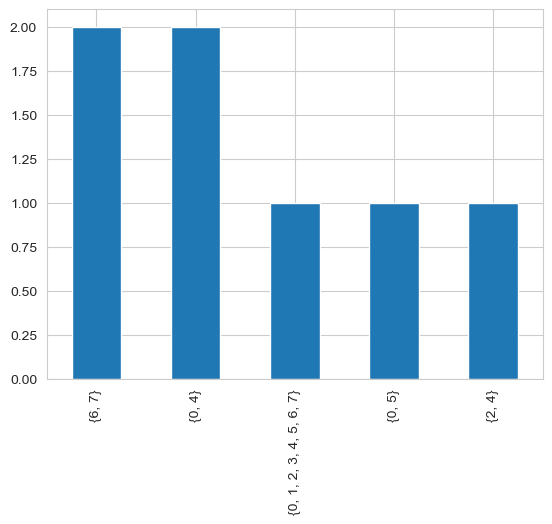

In [32]:
df['selected_feature_set'].value_counts().plot(kind='bar', label='Method')

In [33]:
df.groupby(['Method', 'selected_feature_set'])[['selected_feature_set']].count()#.hist(column='selected_feature_set', label='Method')

selected_feature_set
Method             selected_feature_set                          
All features       {0, 1, 2, 3, 4, 5, 6, 7}                     1
CMIM               {0, 4}                                       1
Feature importance {6, 7}                                       1
JMI                {0, 4}                                       1
RFE                {6, 7}                                       1
Random             {2, 4}                                       1
mRMR               {0, 5}                                       1